### Sonan Obin's stock price prediction model for WMT (LSTM based on the previous 60-day stock price data)

#### Why Walmart Inc.? Because I understand the business model and I'm a loyal Walmart customer myself(their prices are too cheap to pass up)

## Code

#### Importing the packages 

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
import math
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

#### Getting the stock quote

In [8]:
df = yf.download('WMT', start='2015-01-01', end='2023-04-21')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,86.269997,86.720001,85.550003,85.900002,71.958000,4501800
2015-01-05,85.720001,86.320000,85.510002,85.650002,71.748558,6979000
2015-01-06,85.980003,86.750000,85.790001,86.309998,72.301430,8205100
2015-01-07,86.779999,88.680000,86.669998,88.599998,74.219742,8498400
2015-01-08,89.209999,90.669998,89.070000,90.470001,75.786240,12713600
...,...,...,...,...,...,...
2023-04-14,149.029999,149.889999,148.149994,148.479996,148.479996,3488300
2023-04-17,148.639999,149.669998,148.500000,149.520004,149.520004,5388900
2023-04-18,149.779999,150.339996,149.440002,149.850006,149.850006,4494100


#### Getting the number of rows and columns in the dataset

In [9]:
df.shape

(2089, 6)

#### Visualizing the closing price history 

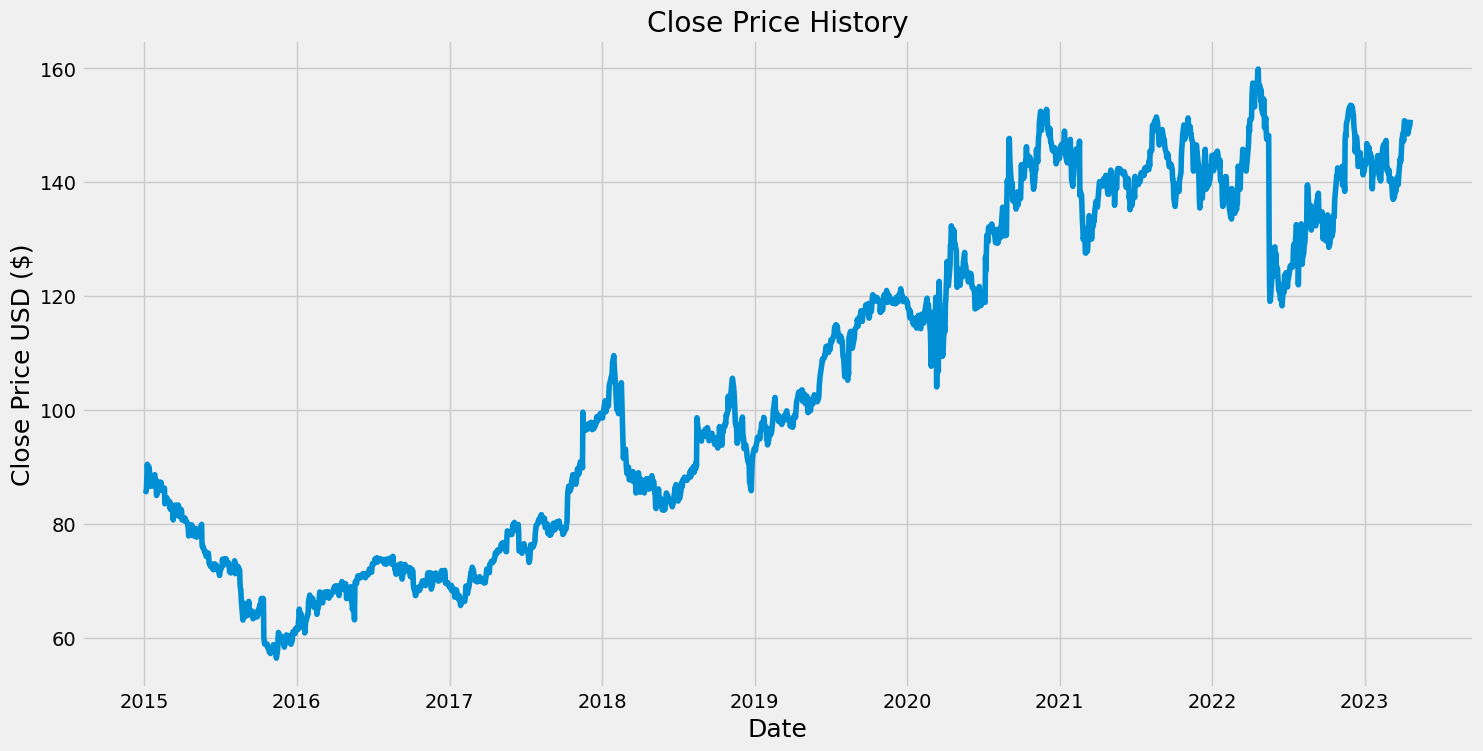

In [10]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

#### Creating a new dataframe with only the close column 

In [11]:
data=df.filter(['Close'])

#### Converting the dataframe to a numpy array

In [13]:
dataset=data.values

#### Getting the number of rows to train the model on

In [18]:
training_data_len = math.ceil( len(dataset) * .8)
training_data_len

1672

#### Scaling the data 

In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.28496862],
       [0.282552  ],
       [0.28893185],
       ...,
       [0.90314172],
       [0.90468825],
       [0.91396816]])

#### Creating the training data set 

In [21]:
train_data = scaled_data[0:training_data_len , :]

#### Splitting the data into x-train and y_train datasets

In [25]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.28496862, 0.282552  , 0.28893185, 0.31106816, 0.32914455,
       0.31831804, 0.32479458, 0.31793137, 0.29183184, 0.29927501,
       0.29337844, 0.29260517, 0.29212182, 0.30816825, 0.31019821,
       0.31135814, 0.300725  , 0.29386179, 0.30256166, 0.27607546,
       0.28313197, 0.28777192, 0.2922185 , 0.29830838, 0.29879173,
       0.28506531, 0.29840506, 0.28922184, 0.28487194, 0.2840986 ,
       0.28554859, 0.28873856, 0.26196229, 0.26950223, 0.27240214,
       0.27211215, 0.26244565, 0.26466898, 0.2659256 , 0.26621558,
       0.26051238, 0.25287583, 0.26244565, 0.25297244, 0.25577574,
       0.24794589, 0.23460614, 0.2463026 , 0.2463026 , 0.25973904,
       0.2532625 , 0.25239247, 0.24262928, 0.25925568, 0.25993234,
       0.2574191 , 0.24069601, 0.24620592, 0.24098599, 0.25239247])]
[0.24968586363494905]

[array([0.28496862, 0.282552  , 0.28893185, 0.31106816, 0.32914455,
       0.31831804, 0.32479458, 0.31793137, 0.29183184, 0.29927501,
       0.29337844, 0.29260517, 0.29

#### Converting the x_train and y_train to numpy arrays 

In [26]:
x_train , y_train = np.array(x_train), np.array(y_train)

#### Reshaping the data

In [27]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1612, 60, 1)

#### Building the LSTM model 

In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#### Compiling the model

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

#### Training the model

In [30]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1612/1612 [==============================] - 66s 32ms/step - loss: 0.0023


#### Creating the testing dataset  

#### Creating a new array containing scaled values from index 1543 to 2003 

In [34]:
test_data = scaled_data [training_data_len - 60: , :]

#### Creating the datasets x_test and y_test

In [35]:
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

#### Converting the data to a numpy array 

In [36]:
x_test = np.array(x_test)

#### Reshaping the data 

In [37]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#### Getting the model predicited price values 

In [38]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 7s 22ms/step


#### Getting the root mean squared error (RMSE)

In [39]:
rmse = np.sqrt( np.mean(predictions-y_test)**2)
rmse

4.383768790631557

#### Plotting the data

C:\Users\antho\AppData\Local\Temp\ipykernel_18932\2190608793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


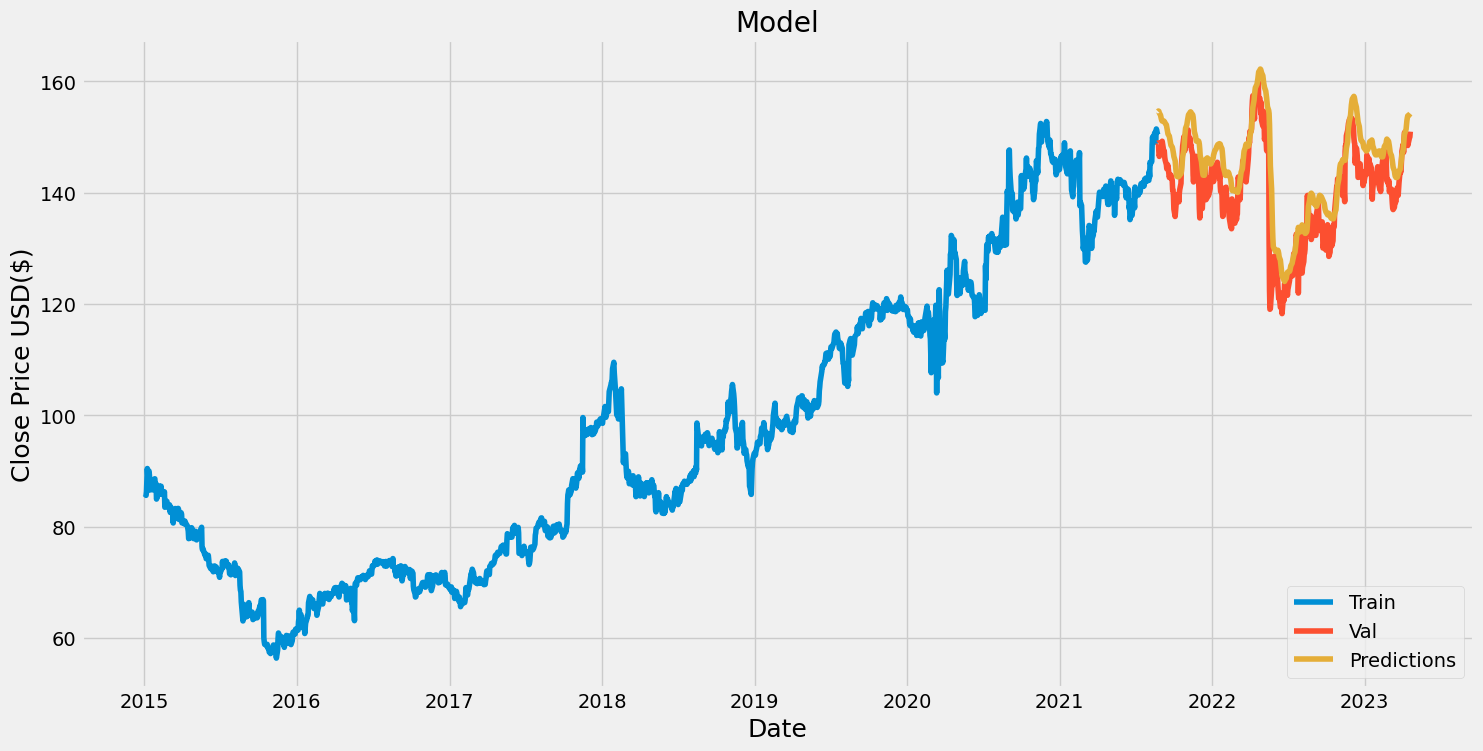

In [45]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#### Showing the valid and predicted prices 

In [46]:
valid

,Close,Predictions
Date,,
2021-08-24,148.899994,154.596832
2021-08-25,148.960007,154.672485
2021-08-26,147.350006,154.625259
2021-08-27,146.520004,154.359421
2021-08-30,147.699997,153.924164
...,...,...
2023-04-14,148.479996,153.815781
2023-04-17,149.520004,153.942596
2023-04-18,149.850006,154.035721


#### Getting the quote 

In [50]:
walmart_quote = yf.download('WMT', start='2015-01-01', end='2023-04-21')

[*********************100%***********************]  1 of 1 completed


#### Creating a new dataframe

In [51]:
new_df = walmart_quote.filter(['Close'])

#### Getting the last 60-day closing price value and convert the dataframe to an array 

In [53]:
last_60_days = new_df[-60:].values

#### Scaling the data between 0 and 1 

In [58]:
last_60_days_scaled = scaler.transform(last_60_days)

#### Creating an empty list 

In [56]:
X_test = []

#### Append the past 60 days

In [59]:
X_test.append(last_60_days_scaled)

#### Converting the X dataset to a numpy array 

In [60]:
X_test = np.array(X_test)

#### Reshaping the data

In [71]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#### Getting the predicted scaled price 

In [72]:
pred_price = model.predict(X_test)

1/1 [==============================] - 6s 6s/step


#### Undo the scaling 

In [73]:
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[121.97966]]


##### The value above is what our model believes the predicted price will be for 2023-04-22 

In [74]:
walmart_quote2 = yf.download('WMT', start='2023-04-22', end='2023-04-22')
print(walmart_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-04-21    151.729996
Name: Close, dtype: float64


##### The value above is the actual price for 2023-04-22. So, our model was off by about 29.750336, which is not too bad

##### So that's it for today, please be sure to stay tuned for whatever will be next